In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsRegressor

import scikitplot as skplt

In [6]:
train =pd.read_csv(r'F:\AI\titanic\train.csv')
test =pd.read_csv(r'F:\AI\titanic\test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
target= train['Survived']
test_id= test['PassengerId']

In [9]:
train1=train.drop(['PassengerId','Survived'],axis=1)
test1=test.drop("PassengerId",axis=1)

In [10]:
data1=pd.concat([train1,test1],axis=0).reset_index(drop=True)
data1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data1.isna().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [12]:
data1.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

In [13]:
data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Text(0.5, 0, 'Titanic Survival Rate')

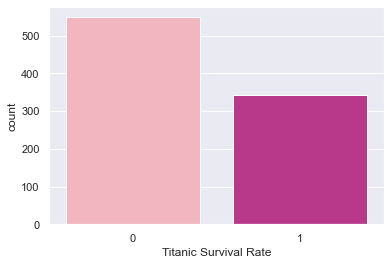

In [14]:
sns.countplot(x=target,palette='RdPu')
plt.xlabel('Titanic Survival Rate')

<AxesSubplot:>

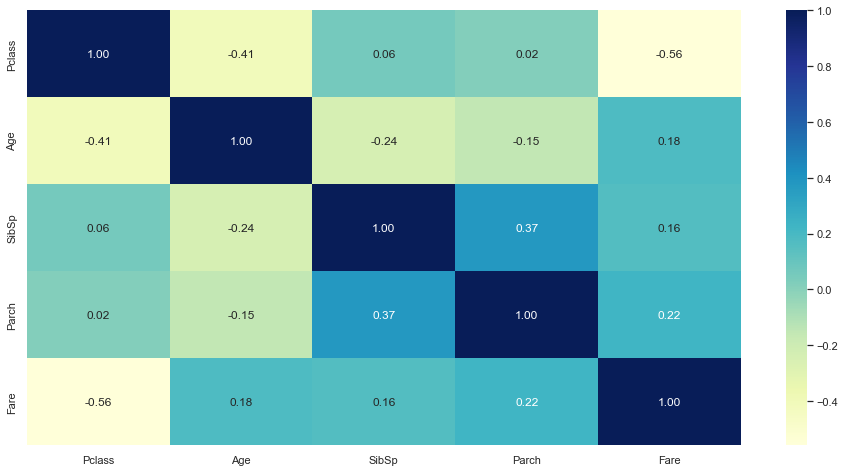

In [17]:
plt.figure(figsize= (16, 8))
sns.heatmap(data1.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

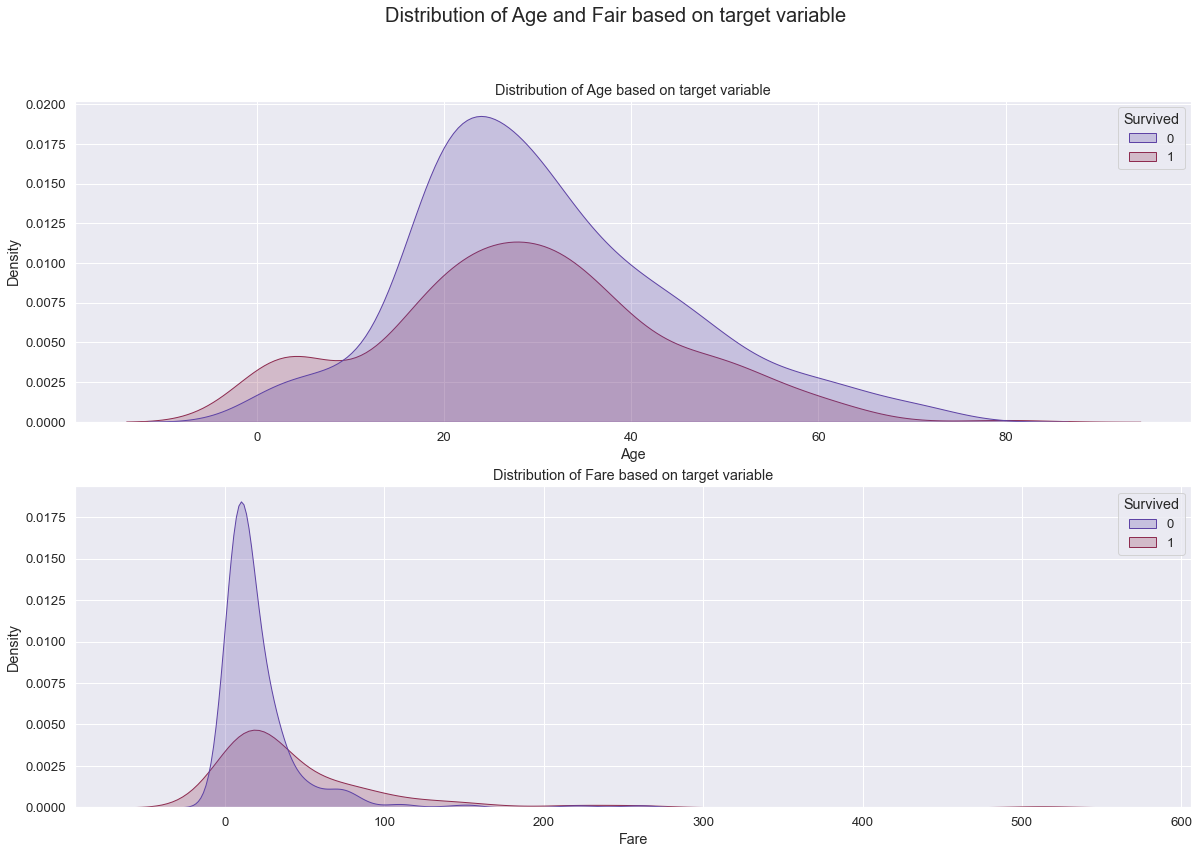

In [19]:
sns.set_context('notebook',font_scale=1.2)
fig, ax=plt.subplots(2, figsize=(20,13))

plt.suptitle("Distribution of Age and Fair based on target variable", fontsize=20)


ax1 = sns.kdeplot(x ='Age', data= train, hue= 'Survived', shade= True, ax= ax[0], palette= 'twilight')
ax1.set(xlabel = 'Age', title= 'Distribution of Age based on target variable')

ax2 = sns.kdeplot(x ='Fare', data= train, hue= 'Survived', shade= True, ax= ax[1], palette= 'twilight')
ax2.set(xlabel = 'Fare', title= 'Distribution of Fare based on target variable')

plt.show()

Text(0.5, 1.0, 'Survival chnace based on Gender')

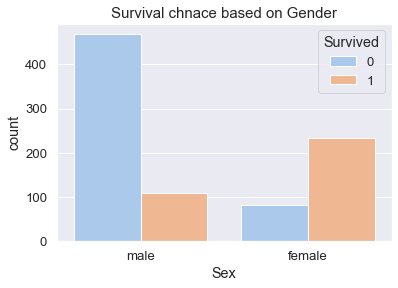

In [20]:
sns.countplot(x='Sex',data=train,hue='Survived',palette='pastel')
plt.title('Survival chnace based on Gender',fontsize=15)

Text(0.5, 1.0, 'Survival chance base on Ticket Class')

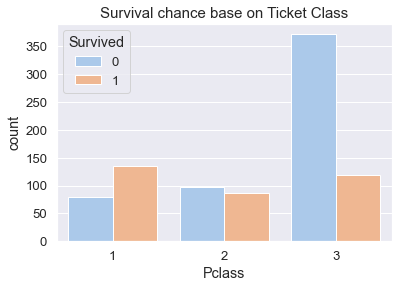

In [24]:
sns.countplot(x='Pclass', data=train,hue='Survived',palette='pastel')
plt.title('Survival chance base on Ticket Class',fontsize=15)

In [29]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

<AxesSubplot:xlabel='Age', ylabel='Count'>

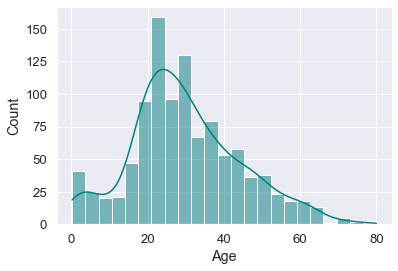

In [27]:
sns.histplot(data1['Age'], color='teal',kde=True)

In [30]:
data2=knn_impute(data1,'Age')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

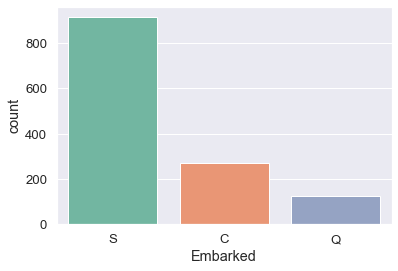

In [31]:
sns.countplot(x=data2['Embarked'],palette='Set2')

In [33]:
data2['Embarked'].fillna('S',inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

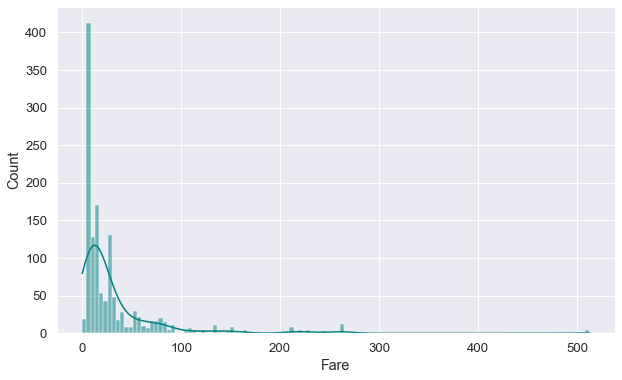

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data2['Fare'],color='Teal',kde=True)

In [35]:
data2['Fare'].fillna(data1['Fare'].median(), inplace=True)

In [36]:
data2.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
##Encoding

In [39]:
data3=data2.copy()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [40]:
data3['Pclass']=data3['Pclass'].apply(str)
target=target.apply(str)

In [43]:
le = LabelEncoder()
numerical_sex = le.fit_transform(data2['Sex'])
numerical_embarked = le.fit_transform(data2['Embarked'])

In [44]:
data3['Sex'] = numerical_sex
data3['Embarked'] = numerical_embarked

In [45]:
data3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [46]:
sc=StandardScaler()
data3[['Age','Fare']]=sc.fit_transform(data3[['Age','Fare']])

In [47]:
data3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.523438,1,0,-0.503291,2
1,1,0,0.656153,1,0,0.734744,0
2,3,0,-0.228540,0,0,-0.490240,2
3,1,0,0.434979,1,0,0.383183,2
4,3,1,0.434979,0,0,-0.487824,2


In [48]:
data3['Family']=np.where(data3['SibSp']+data3['Parch']>0,1,0)
data3.drop(['SibSp','Parch'],axis=1,inplace=True)

In [49]:
data3.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,-0.523438,-0.503291,2,1
1,1,0,0.656153,0.734744,0,1
2,3,0,-0.228540,-0.490240,2,0
3,1,0,0.434979,0.383183,2,1
4,3,1,0.434979,-0.487824,2,0


In [50]:
train_final = data3.loc[:train.index.max(), :].copy()
test_final = data3.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [53]:
lr = LogisticRegression(solver='liblinear', penalty= 'l2')
lr.fit(train_final,target)
test_pred=lr.predict(test_final)
train_pred=lr.predict(train_final)

In [62]:
print('Accuracy Score:', round(accuracy_score(target, train_pred), 3))

Accuracy Score: 0.795


In [63]:
print(classification_report(target, train_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891

